In [1]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
from itertools import cycle
import altair as alt
import scipy.stats

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

result = pd.read_csv('DataScience1_ZACData.csv')


In [3]:
result.head(150)

,ISO_Code,Country_FD,region,Freedom_Score,Country_HN,Happiness_Score
0,ALB,Albania,Eastern Europe,7.84,Albania,4.644
1,DZA,Algeria,Middle East & North Africa,4.99,Algeria,5.872
2,AGO,Angola,Sub-Saharan Africa,5.40,Angola,3.795
3,ARG,Argentina,Latin America & the Caribbean,6.86,Argentina,6.599
4,ARM,Armenia,Caucasus & Central Asia,7.42,Armenia,4.376
...,...,...,...,...,...,...
142,VEN,Venezuela,Latin America & the Caribbean,3.80,Venezuela,5.250
143,VNM,Vietnam,South Asia,6.29,Vietnam,5.074
144,YEM,Yemen,Middle East & North Africa,4.30,Yemen,3.593
145,ZMB,Zambia,Sub-Saharan Africa,6.49,Zambia,4.514


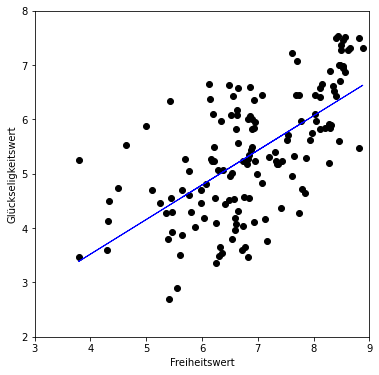

In [4]:
X = result[["Happiness_Score","Freedom_Score"]]
#Visualise data points
plt.figure(figsize=(6,6))
plt.scatter(X["Freedom_Score"],X["Happiness_Score"],c='black')
plt.xlabel('Freiheitswert')
plt.ylabel('Glückseligkeitswert')

#Linear regression line
fs=[]
for x in result["Freedom_Score"]:
  fs.append(x) 
hs=[]
for x in result["Happiness_Score"]:
  hs.append(x) 

fs = np.reshape(fs, (-1, 1))
hs = np.reshape(hs, (-1, 1))

fs_train = fs[:-20]
fs_test = fs[-20:]

hs_train = hs[:-20]
hs_test = hs[-20:]

fs_train = fs
fs_test = fs

hs_train = hs
hs_test = hs

regr = linear_model.LinearRegression()

regr.fit(fs_train, hs_train)

hs_pred = regr.predict(fs_test)

plt.plot(fs_test, hs_pred, color='blue', linewidth=1)


plt.xlim([3, 9])
plt.ylim([2, 8])

plt.savefig("original.jpg")
plt.show()

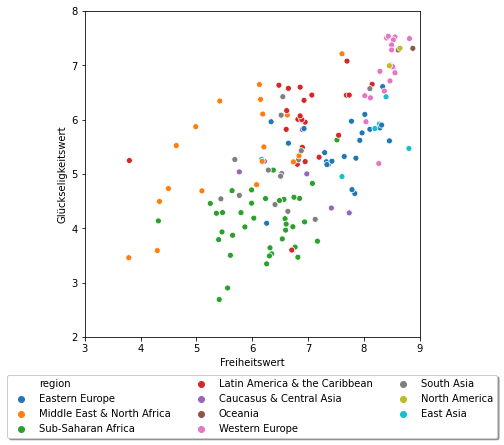

In [5]:
#coloring the regions
plt.figure(figsize=(6,6))

g=sns.scatterplot(x="Freedom_Score", y="Happiness_Score",
              hue="region",
              data=result);
g.set(ylim=(2, 8))
g.set(xlim=(3, 9))

g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

plt.xlabel('Freiheitswert')
plt.ylabel('Glückseligkeitswert')

g.figure.savefig("eingefaerbt.jpg")

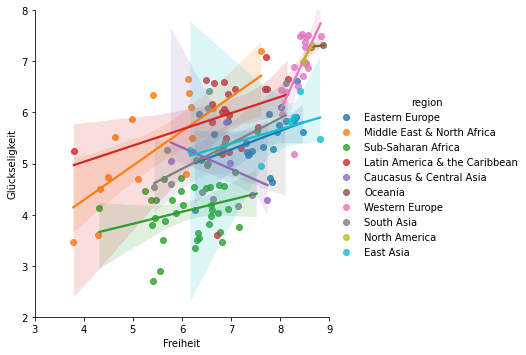

In [6]:
#different presentation of regions
g = sns.lmplot(x='Freedom_Score', y='Happiness_Score', data=result, hue='region')
g.set(ylim=(2, 8))
g.set(xlim=(3, 9))
plt.xlabel('Freiheit')
plt.ylabel('Glückseligkeit')
g.savefig("eingefaerbt-gruppen.jpg")

In [7]:
#k-means algorithm

#number of cluster
K=6

# Select random as centroids
Centroids = (X.sample(n=K))

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Freedom_Score"]-row_d["Freedom_Score"])**2
            d2=(row_c["Happiness_Score"]-row_d["Happiness_Score"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Happiness_Score","Freedom_Score"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Freedom_Score'] - Centroids['Freedom_Score']).sum() + (Centroids_new['Freedom_Score'] - Centroids['Freedom_Score']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Happiness_Score","Freedom_Score"]]

<ipython-input-7-6ce0245d83d1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


-0.8063546431956041
-0.6503407917209714
-0.043237586168624276
0.24098458485958396
-0.012427346522592586
0.11545576373941557
-0.2188027678661708
-0.20887339480442968
-0.10588564692012525
-0.011482228116712179
-0.003556989247311293
0.0


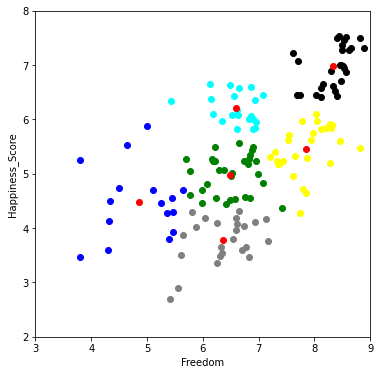

In [8]:
#k-means result
color=['blue','green','cyan','gray','yellow','black']
plt.figure(figsize=(6,6))

for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Freedom_Score"],data["Happiness_Score"],c=color[k]) 

plt.scatter(Centroids["Freedom_Score"],Centroids["Happiness_Score"],c='red')
plt.xlabel('Freedom')
plt.ylabel('Happiness_Score')
grouped_df = X.groupby(["Cluster"])
      
plt.xlim([3, 9])
plt.ylim([2, 8])
plt.savefig("k-means.jpg")
plt.show()

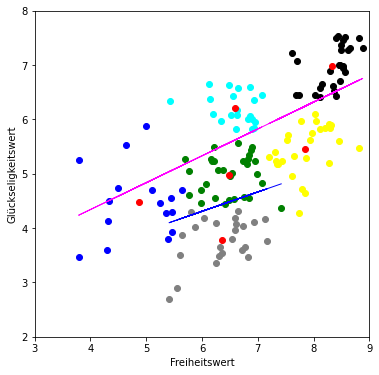

In [9]:
#K-Means with two regression lines
#In the code we were not yet able to always assign the regression line for our desired clusters. 
#This leads to the fact that the regression lines overlap in some runs

color=['blue','green','cyan','gray','yellow','black']
plt.figure(figsize=(6,6))

for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Freedom_Score"],data["Happiness_Score"],c=color[k]) 

plt.scatter(Centroids["Freedom_Score"],Centroids["Happiness_Score"],c='red')
plt.xlabel('Freiheitswert')
plt.ylabel('Glückseligkeitswert')

cluster=[]
clusterfs1=[]
clusterfs2=[]
clusterfs3=[]
clusterfs4=[]
clusterfs5=[] 
clusterfs6=[]
clusterhs1=[]
clusterhs2=[]
clusterhs3=[]
clusterhs4=[]
clusterhs5=[] 
clusterhs6=[]

clusterHS=[]
clusterFS=[]

for x in X["Cluster"]:
    cluster.append(x)
 
for y in X["Freedom_Score"]:
    clusterFS.append(y)
    
for z in X["Happiness_Score"]:
    clusterHS.append(z) 


for i in range(0,len(cluster)-1):
    if cluster[i] == 1:
        clusterfs1.append(clusterFS[i])
        clusterhs1.append(clusterHS[i])
    if cluster[i] == 2:
        clusterfs2.append(clusterFS[i])
        clusterhs2.append(clusterHS[i])
    if cluster[i] == 3:
        clusterfs3.append(clusterFS[i])
        clusterhs3.append(clusterHS[i])
    if cluster[i] == 4:
        clusterfs4.append(clusterFS[i])
        clusterhs4.append(clusterHS[i])
    if cluster[i] == 5:
        clusterfs5.append(clusterFS[i])
        clusterhs5.append(clusterHS[i])
    if cluster[i] == 6:
        clusterfs6.append(clusterFS[i])
        clusterhs6.append(clusterHS[i])
       
    
regressionfs1 = np.concatenate((clusterfs2, clusterfs4), axis=None)
regressionhs1 = np.concatenate((clusterhs2, clusterhs4), axis=None)

regressionfs2 = np.concatenate((clusterfs1, clusterfs3, clusterfs5, clusterfs6), axis=None)
regressionhs2 = np.concatenate((clusterhs1, clusterhs3, clusterhs5, clusterhs6), axis=None)

fsr1 = np.reshape(regressionfs1, (-1, 1))
hsr1 = np.reshape(regressionhs1, (-1, 1))
fs_train1 = fsr1
fs_test1 = fsr1
hs_train1 = hsr1
hs_test1 = hsr1
regr1 = linear_model.LinearRegression()
regr1.fit(fs_train1, hs_train1)
hs_pred1 = regr1.predict(fs_test1)    
    
fsr2 = np.reshape(regressionfs2, (-1, 1))
hsr2 = np.reshape(regressionhs2, (-1, 1))
fs_train2 = fsr2
fs_test2 = fsr2
hs_train2 = hsr2
hs_test2 = hsr2
regr2 = linear_model.LinearRegression()
regr2.fit(fs_train2, hs_train2)
hs_pred2 = regr2.predict(fs_test2)

plt.xlim([3, 9])
plt.ylim([2, 8])
plt.plot(fs_test1, hs_pred1, color='blue', linewidth=1)
plt.plot(fs_test2, hs_pred2, color='magenta', linewidth=1)
plt.savefig("k-means.jpg")
plt.show()


[6.65       5.56899977]
[6.03       4.19000006]
[8.11       6.57200003]


a:\programme\python\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


<Figure size 432x288 with 0 Axes>

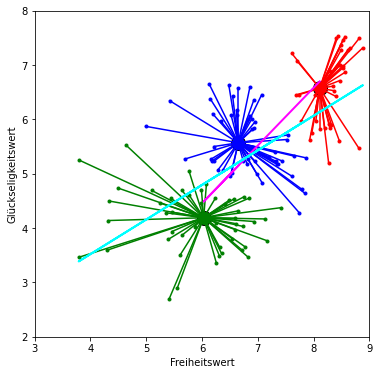

In [10]:
#Affinity Propagation algorithm

# #############################################################################
# Generate sample data

#for the magenta regression line
fsc=[6.65, 6.03, 8.11]
hsc=[5.56899977, 4.19000006, 6.57200003]

fs=[]
hs=[]
for x in result["Freedom_Score"]:
  fs.append(x)
for x in result["Happiness_Score"]:
  hs.append(x) 

fsrc = np.reshape(fsc, (-1, 1))
hsrc = np.reshape(hsc, (-1, 1))

fs_trainc = fsrc
fs_testc = fsrc
hs_trainc = hsrc
hs_testc = hsrc

regrc = linear_model.LinearRegression()

regrc.fit(fs_trainc, hs_trainc)

hs_predc = regrc.predict(fs_testc)

fsr = np.reshape(fs, (-1, 1))
hsr = np.reshape(hs, (-1, 1))

fs_train = fsr
fs_test = fsr
hs_train = hsr
hs_test = hsr


regr = linear_model.LinearRegression()

regr.fit(fs_train, hs_train)

hs_pred = regr.predict(fs_test)

X = np.vstack((fs, hs)).T 

#this three initial value combinations lead to the same cluster result
centers = [[4, 4], [5, 5], [6, 6], [7, 7], [8, 8]]
#centers = [[3, 8], [2, 9], [4.5, 4.5], [2, 3], [8, 9]]
#centers = [[7.882800, 5.500680], [5.076667, 4.179762], [6.522273, 6.191409], [8.338214, 6.975750], [6.611071, 4.064250],[6.516522, 5.176391]]
    
#Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# Plot result
plt.close('all')
plt.figure(1)
plt.clf()
plt.figure(figsize=(6,6))

plt.xlim([3, 9])
plt.ylim([2, 8])

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    print(cluster_center)

plt.plot(fs_testc, hs_predc, color='magenta', linewidth=2)
plt.plot(fs_test, hs_pred, color='cyan', linewidth=2)

plt.xlabel('Freiheitswert')
plt.ylabel('Glückseligkeitswert')

plt.savefig("affinity-propagation.jpg")
plt.show()
